In [1]:
from population import *
from gen_landscape import *
import numpy as np
import datetime

In [2]:
mn_dist = 200
points_to_set_diamond = np.array([[mn_dist, 0], [0, mn_dist], [-mn_dist, 0], [0, -mn_dist], [0, 0]])
sqr_dist = np.sqrt(mn_dist**2/2)
points_to_set_sqr = np.array([[sqr_dist, sqr_dist], [-sqr_dist, sqr_dist],
                              [-sqr_dist, -sqr_dist], [sqr_dist, -sqr_dist], [0, 0]])
# pure concave
assigned_concave = [-mn_dist, -mn_dist, -mn_dist, -mn_dist, 0]
assigned_half_saddle = [-mn_dist, mn_dist, -mn_dist, -mn_dist, 0]
assigned_saddle = [-mn_dist, mn_dist, -mn_dist, mn_dist, 0]
assigned_half_convex = [-mn_dist, mn_dist, mn_dist, mn_dist, 0]
assigned_convex = [mn_dist, mn_dist, mn_dist, mn_dist, 0]

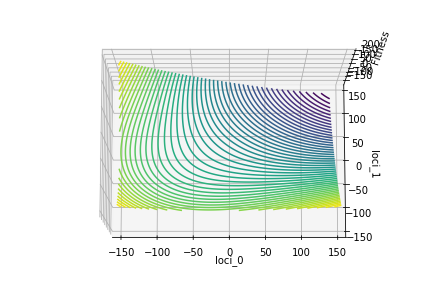

In [3]:
land = Landscape2D(points_chosen=points_to_set_sqr, points_fitness_values=assigned_half_convex)
land.draw()

In [4]:
gia = Population(population_size=5000, loci=2, gene_mean=0, gene_sd=10,
                 proportion_asexual=0.5, survival_rate=0.5, mutation_std=2, landscape=land)

camera1 = Camera()
frame_rate = 1
for i in range(11000):
    
    if gia.population_sizes(asex=True) < 100:
        result = 2
        break
    elif gia.population_sizes(sex=True) < 100:
        result = 1
        break
    elif i > 10000:
        result = 0
        break
    if i % 100 == 0:
        print('just completed iteration ',i)
    if i%frame_rate==0:
        camera1.take_shot(gia)
    gia.mutation_stage()
    gia.survival_stage()
    gia.replication_stage()

print(i)   

just completed iteration  0
51


In [5]:
camera1.publish()

In [6]:
print('result:', result)

result: 2
